In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
# Todo: If you want to process a SPECIFIC data file, set this value. Otherwise, it will load the latest file in the data directory.
FILE_TO_LOAD = None     # "data/garmin_activities_YYYY_MM_DD_HH_MM_SS.csv"

if FILE_TO_LOAD is None:
    # Get the list of all files in the data directory
    list_of_files = glob.glob('data/*')
    # Get the latest file
    FILE_TO_LOAD = max(list_of_files, key=os.path.getctime)

print(f"File to Load file: {FILE_TO_LOAD}")

File to Load file: data/garmin_activities_2025_03_07_10_10_42.csv


In [5]:
# Load the CSV file
data = pd.read_csv(FILE_TO_LOAD)
data

,Activity ID,Date,Start Time,Activity Type,Distance (km),Distance (mi),Duration (min),Calories,Avg HR,Max HR,Avg Pace (min/km),Avg Pace (min/mi),HR Time in Zone 1 (min),HR Time in Zone 2 (min),HR Time in Zone 3 (min),HR Time in Zone 4 (min),HR Time in Zone 5 (min)
0,18441429754,2025-03-04,2025-03-04 16:20:24,virtual_ride,31.363721,19.488506,60.166667,586.0,137.0,152.0,1.918352,3.087290,0.650000,7.316667,51.366667,0.533333,0.000000
1,18423093880,2025-03-02,2025-03-02 16:28:02,virtual_ride,31.267141,19.428494,60.183333,631.0,137.0,151.0,1.924811,3.097684,0.433333,5.716667,53.616667,0.200000,0.000000
2,18395656601,2025-02-27,2025-02-27 15:19:07,virtual_ride,20.907730,12.991457,50.250000,478.0,139.0,153.0,2.403417,3.867926,0.616667,4.600000,43.200000,1.450000,0.000000
3,18359504256,2025-02-23,2025-02-23 16:07:23,running,5.006070,3.110627,25.413116,342.0,159.0,170.0,5.076461,8.169774,0.199983,0.300000,1.683300,22.833250,0.287933
4,18349975952,2025-02-22,2025-02-22 14:33:05,road_biking,36.797621,22.864975,78.531665,808.0,143.0,160.0,2.134151,3.434584,0.383400,7.778183,52.800033,17.383167,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,8880824327,2022-05-23,2022-05-23 14:52:22,running,4.444000,2.761373,30.030884,291.0,136.0,174.0,6.757625,10.875346,0.000000,0.000000,0.000000,0.000000,0.000000
390,8862210906,2022-05-20,2022-05-20 17:31:46,running,4.319220,2.683838,30.027199,278.0,129.0,160.0,6.951995,11.188156,0.000000,0.000000,0.000000,0.000000,0.000000
391,8836930883,2022-05-16,2022-05-16 14:43:08,running,4.380930,2.722183,30.034916,283.0,131.0,162.0,6.855831,11.033394,0.000000,0.000000,0.000000,0.000000,0.000000
392,8817594471,2022-05-13,2022-05-13 15:00:38,running,4.239580,2.634352,30.041500,271.0,116.0,153.0,7.085961,11.403753,0.000000,0.000000,0.000000,0.000000,0.000000


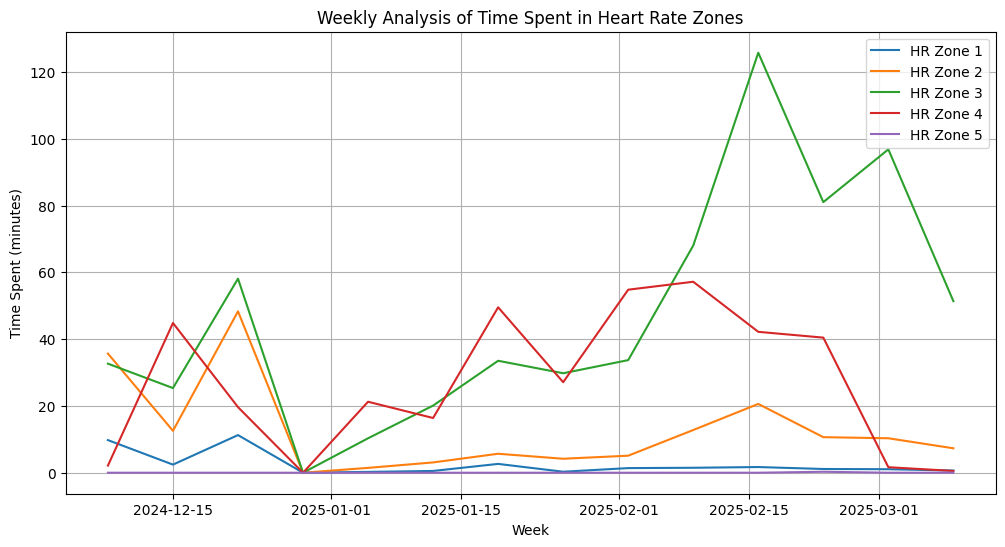

In [12]:
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['Date'])

# Filter out rows where 'HR Time in Zone 2 (min)' is NaN or 0
data = data.dropna(subset=['HR Time in Zone 2 (min)'])
data = data[data['HR Time in Zone 2 (min)'] != 0]

# Set the date column as the index
data.set_index('date', inplace=True)

# Resample the data by week and sum the time spent in each heart rate zone
weekly_data = data.resample('W').sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['HR Time in Zone 1 (min)'], label='HR Zone 1')
plt.plot(weekly_data.index, weekly_data['HR Time in Zone 2 (min)'], label='HR Zone 2')
plt.plot(weekly_data.index, weekly_data['HR Time in Zone 3 (min)'], label='HR Zone 3')
plt.plot(weekly_data.index, weekly_data['HR Time in Zone 4 (min)'], label='HR Zone 4')
plt.plot(weekly_data.index, weekly_data['HR Time in Zone 5 (min)'], label='HR Zone 5')
plt.xlabel('Week')
plt.ylabel('Time Spent (minutes)')
plt.title('Weekly Analysis of Time Spent in Heart Rate Zones')
plt.legend()
plt.grid(True)
plt.show()